In [278]:
url = 'http://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Original%29'

### Cancer Diagnosis  
#### Using set of breast cancer data, create a model to predict breast cancer.  
#### Also, what traits are most indicative of whether or not an individual will be diagnosed?

### Questions that need answering:

 1. What question are you trying to solve (or prove wrong) ?   
 __We are trying to predict cancer.  What traits are the most indicative of an individual with cancer?__
 1. What kind of data do you have? -> describe the source.. 
 __Clump thickness, uniformity of cell size and shape, marginal adhesion, single epithelial cell size, bare nuclei, bland chromatin, normal nucleoli, and mitoses. Demographic data.  __
 1. Do some EDA, plots
 1. What's missing from the data and how do you deal with it?  
 __stuff.  Set NaNs, and why. After codes, and plots.  __
 1. Where are the outliers and why should we pay attention to them?  
 __stuff  Why is it an outlier.  We remove outliers. Look for entries > 2.5 std deviations. Code, tables, and markdown explaining. 
 let's do this, and why, ...__
 1. How can you add, change, or remove features to get more out of your data?  
 __ feature importances, pca, dropping low variance items, correlated feature pairs, features too highly correlated, feature 
 engineering, transforming, timestamp and make a month, day, year column.

|Num | Attribute|Domain|  
|:----|:------------|:-----------|  
|1|Sample code number|id number|  
|2|Clump Thickness|1 - 10|  
|3|Uniformity of Cell Size |1 - 10  |
|4|Uniformity of Cell Shape|1 - 10  |
|5| Marginal Adhesion| 1 - 10  |
|6| Single Epithelial Cell Size| 1 - 10  |
|7| Bare Nuclei| 1 - 10  |
|8| Bland Chromatin| 1 - 10  |
|9| Normal Nucleoli| 1 - 10  |
|10| Mitoses| 1 - 10  |
|11| Class|(2 for benign, 4 for malignant)|

In [279]:
# Controls
flag_to_run_rf = True
flag_to_plot_them = False
flag_to_run_correlation_matrix = True
flag_to_run_features_importance = False
flag_to_run_gradient_boosting  = False
flag_to_run_linear_regression  = False
flag_to_run_logistic_regression = True
flag_to_run_lasso_regression = False
flag_to_run_ridge_regression = False
flag_to_run_svc = False

In [280]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt

%matplotlib inline

import chardet
import datetime
from sklearn import ensemble
from sklearn import datasets
from sklearn import linear_model
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import time, sys
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.model_selection import cross_val_predict, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler

In [281]:
# add this to a dictionary
# Constants
max_iterations         = 10            # set it to > 0 for determining the features inportance
random_state           = 57
test_size              = 0.10
train_size             = 0.90

begin_string = '\n'*3+'Begin'
end_string = 'End'+'\n'*3

# Regression/Classification control
Regression = False 

print("Regression = {}".format(Regression))

Regression = False


In [282]:
# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_row', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [283]:
file = 'breast-cancer-wisconsin-data.csv'
path = path="../../../../Datafiles/"
column_names = ['SampleCodeNumber', 'ClumeppThickness', 'UniformityCellSize','UniformityCellShape',
              'MarginalAdhesion','SingleEpithelial','BareNuclei','BlandChromatin','NormalNucleoli',
             'Mitosis','Class']

with open(path+file, 'rb') as f:
    result = chardet.detect(f.read()) # or readline if the file is large
df=pd.read_csv(path+file,encoding=result['encoding'],header=None, names = column_names)
print("there are {:,} entries in the data file {}".format(len(df), file))
print("columns={}".format(df.columns))

there are 699 entries in the data file breast-cancer-wisconsin-data.csv
columns=Index(['SampleCodeNumber', 'ClumeppThickness', 'UniformityCellSize', 'UniformityCellShape', 'MarginalAdhesion', 'SingleEpithelial', 'BareNuclei', 'BlandChromatin', 'NormalNucleoli', 'Mitosis', 'Class'], dtype='object')


In [284]:
# data Cleanup
columns_to_cleanup = []
for column in columns_to_cleanup:
    print("we are now cleaning up column {}".format(column))
    df[column].fillna(-1, inplace=True)
df['BareNuclei'] = np.where(df['BareNuclei'] == '?',-1, df['BareNuclei'])
df['Class'] = np.where(df['Class'] == 4, 1, 0)
print('we have cleaned up the dataframe.')

we have cleaned up the dataframe.


In [285]:
def print_timestamp_old(displaytext):    
    import sys
    import datetime
    datetime_now = str(datetime.datetime.now())
    print("{:19.19}: {} ".format(datetime_now, displaytext))

In [286]:
def print_timestamp(displaytext):    
    import sys
    import datetime
    datetime_now = str(datetime.datetime.now())
    print("{:19.19}: In: {} {} ".format(datetime_now, sys._getframe(1).f_code.co_name, displaytext))

In [287]:
df.isnull().sum()

SampleCodeNumber       0
ClumeppThickness       0
UniformityCellSize     0
UniformityCellShape    0
MarginalAdhesion       0
SingleEpithelial       0
BareNuclei             0
BlandChromatin         0
NormalNucleoli         0
Mitosis                0
Class                  0
dtype: int64

In [288]:
df.columns

Index(['SampleCodeNumber', 'ClumeppThickness', 'UniformityCellSize', 'UniformityCellShape', 'MarginalAdhesion', 'SingleEpithelial', 'BareNuclei', 'BlandChromatin', 'NormalNucleoli', 'Mitosis', 'Class'], dtype='object')

In [289]:
# Definine outcome and predictors.
print("the current time of start is {}".format(str(datetime.datetime.now())))

# Make the categorical variables below into enumerated categorical variables
for dummy_column in []: # Remove these for now...
    df = pd.concat([df, pd.get_dummies(df[dummy_column])], axis=1)
df.columns = df.columns.str.replace(' ', '')

y = df['Class']
columns_excluded = ['Class','SampleCodeNumber'] # skip Class, the label, and SampleCodeNumber, which we do not need
X = df.loc[:, ~df.columns.isin(columns_excluded)]

print("End is {}".format(str(datetime.datetime.now())))

the current time of start is 2019-06-07 00:26:36.725577
End is 2019-06-07 00:26:36.727283


In [290]:
X.sample(20)
X.head()

,ClumeppThickness,UniformityCellSize,UniformityCellShape,MarginalAdhesion,SingleEpithelial,BareNuclei,BlandChromatin,NormalNucleoli,Mitosis
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1


In [291]:
X.dtypes
X.describe()

,ClumeppThickness,UniformityCellSize,UniformityCellShape,MarginalAdhesion,SingleEpithelial,BlandChromatin,NormalNucleoli,Mitosis
count,699.000,699.000,699.000,699.000,699.000,699.000,699.000,699.000
mean,4.418,3.134,3.207,2.807,3.216,3.438,2.867,1.589
std,2.816,3.051,2.972,2.855,2.214,2.438,3.054,1.715
min,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
25%,2.000,1.000,1.000,1.000,2.000,2.000,1.000,1.000
50%,4.000,1.000,1.000,1.000,2.000,3.000,1.000,1.000
75%,6.000,5.000,5.000,4.000,4.000,5.000,4.000,1.000
max,10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.000


In [292]:
X.isnull().sum()

ClumeppThickness       0
UniformityCellSize     0
UniformityCellShape    0
MarginalAdhesion       0
SingleEpithelial       0
BareNuclei             0
BlandChromatin         0
NormalNucleoli         0
Mitosis                0
dtype: int64

In [293]:
X.dtypes

ClumeppThickness        int64
UniformityCellSize      int64
UniformityCellShape     int64
MarginalAdhesion        int64
SingleEpithelial        int64
BareNuclei             object
BlandChromatin          int64
NormalNucleoli          int64
Mitosis                 int64
dtype: object

In [294]:
def plot_them():
    for column in X_train.columns:
#         plt.hist(X_train[column]*100, bins=40)
        plt.scatter(y_train, X_train[column]*100)
        plt.xlabel(column)
        plt.show()

In [295]:
def rfc_and_feature_importances(rf):    # Here we are using Random Forest classifier method to determine the top 30 features.

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, train_size=train_size)
    
    ## Fit the model on your training data.
    rf.fit(X_train, y_train) 
    
    ## And score it on your testing data.
    rf.score(X_test, y_test)

    feature_importance = rf.feature_importances_

    # Make importances relative to max importance.
    feature_importance = 100.0 * (feature_importance / feature_importance.max())
    sorted_idx = np.argsort(feature_importance)
    cols=X.columns[sorted_idx].tolist() 
    cols=cols[::-1]
    pos = np.arange(sorted_idx.shape[0]) + .5
    plt.subplot(1, 2, 2)
    plt.barh(pos, feature_importance[sorted_idx], align='center')
    plt.yticks(pos, X.columns[sorted_idx])
    plt.xlabel('Relative Importance')
    plt.title('Variable Importance')
    plt.show()
#     print("We are returning these columns {}".format(cols))
    return cols[:30] # return it sorted

In [296]:
def run_features_importance(rf,n):
# Here we will return the feature importances
    all_feature_important_columns = []
 
    for i in range(1,n):
        print_timestamp('running rfc iteration {} features importance for {} times'.format(i,n))
        columns2 = rfc_and_feature_importances(rf)
#         columns2.extend('{}'.format(i))
        all_feature_important_columns = all_feature_important_columns + columns2
    #     print("all_feature_import_columns={}".format(all_feature_important_columns))

    print("\nBOD:\nall_feature_important_columns = {}\nEOD".format(sorted(all_feature_important_columns)))
    for feature in set(all_feature_important_columns):
        print_timestamp("the NOC of feature {} in all_feature_important_columns is {}".format(feature, all_feature_important_columns.count(feature)))

In [297]:
def run_correlation_matrix():
    
    print_timestamp('Begin'+'\n'*3)
    
    # Setup the correlation matrix.
    corrmat = X.corr()
    print(corrmat)

    # Set up the subplots
    f, ax = plt.subplots(figsize=(12, 9))

    # Let's draw the heatmap using seaborn.
    sns.heatmap(corrmat, vmax=.6, square=True)
    plt.show()
    
    print_timestamp('\n'*3+'End')

In [298]:
# Let's fit it with the RFC training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, train_size=train_size, random_state=0)
print("train_size = {}, X_train is {}, and y_train is {}".format(train_size, len(X_train), len(y_train)))
print("test_size  = {}, X_test  is {}, and y_test is {}".format(test_size, len(X_test), len(y_test)))

train_size = 0.9, X_train is 629, and y_train is 629
test_size  = 0.1, X_test  is 70, and y_test is 70


In [299]:
def run_rf(rf):
    print_timestamp('Begin run_rf part 1')
    
    ## Fit the model on your training data.
    rf.fit(X_train, y_train)   
    
    ## Let's score it with the training data set
    train_score = rf.score(X_train, y_train)
    print("Training score = {}".format(train_score))

    ## Let's score it with the test data set
    test_score = rf.score(X_test, y_test)
    
    print("Test score = {}".format(test_score))
    #Let's run cross validate score with the training data set
#     cross_val_score(rf, X_train, y_train, cv=5)
    
    print_timestamp('End run_rfr part 1')

Let's try predicting with gradient boosting classification

In [300]:
def run_gradient_boosting():

    print_timestamp('Begin')
    
    clf = ensemble.GradientBoostingClassifier(**params)

    #Let's run cross validate score with the training data set
    cross_val_score(clf, X_train, y_train, cv=5)

    loss_function = 'deviance' # could be exponential
    depth_value = 8
    params = {'n_estimators': 500,
              'max_depth': 8,
              'loss_function': loss_function,
              'max_leaf_nodes': depth_value, # 8 worked best...
              'min_samples_leaf': depth_value * 3
              ,'random_state' : random_state
             }

    clf.fit(X_train, y_train)

    predict_train = clf.predict(X_train)
    predict_test = clf.predict(X_test)
    
    print_timestamp('End')

In [301]:
def run_svc():

    print_timestamp('\n'*3+'Begin run_svc')
    
    # Let's do a linear Support Vector Classifier
    print_timestamp('Running SVC(kernel=linear')
    svm = SVC(kernel = 'linear')
    
    # Let's fit the training model
    print_timestamp('Running svm.fit')
    svm.fit(X_train, y_train)
    
    # Let's score the training set
    print_timestamp('Running svm.score for the training set')
    svm.score(X_train, y_train)
    
    # Let's score the test set
    print_timestamp('Running svm.fit for the test set')
    svm.score(X_test, y_test)

    print_timestamp('\n'*3+'End run_svc')

In [302]:
def run_logistic_regression():
    print_timestamp('\n'*3+'Begin')

    lr = LogisticRegression(C=1e20, solver='lbfgs', max_iter=1000)

    print_timestamp('Running lr.fit for the training set')
    lr.fit(X_train, y_train)
    
    print_timestamp('Running lr.fit for the training set')
    print('\nR-squared simple model training set yields:')
    print(lr.score(X_train, y_train))
    print("here comes the test set")
    print(lr.score(X_test, y_test))
    
    print_timestamp('\n'*3+'End')

In [303]:
def run_linear_regression():

    print_timestamp('\n'*3+'Begin')

    regr = linear_model.LinearRegression()

    print_timestamp('Running regr.fit for the training set')
    regr.fit(X_train, y_train)
    
    print("\nCoeffecients: \n", regr.coef_)
    print("\nIntercept: \n", regr.intercept_)
    print("\nR-squared for training data set:")
    print(regr.score(X_train, y_train))
    
    print("\nR-squared for test data set:")
    print(regr.score(X_test, y_test))
    
    print_timestamp('End run_linear_regression.\n\n')
    
    print_timestamp('\n'*3+'End')

In [304]:
def run_ridge_regression():
    # Fitting a ridge regression model. Alpha is the regularization
    # parameter (usually called lambda). As alpha gets larger, parameter
    # shrinkage grows more pronounced. Note that by convention, the
    # intercept is not regularized. Since we standardized the data
    # earlier, the intercept should be equal to zero and can be dropped.
    print_timestamp('\n'*3+'Begin')
    
    ridgeregr = linear_model.Ridge(alpha=10, fit_intercept=False) 
    ridgeregr.fit(X_train, y_train)
    print(ridgeregr.score(X_train, y_train))
#     origparacms = ridgeregr.coef_[0]
#     print(origparams)

#     ridgeregrBig = linear_model.Ridge(alpha=10, fit_intercept=False)
#     ridgeregrBig.fit(X_train2, y_train)
#     print(ridgeregrBig.score(X_train2, y_train))
#     newparams = ridgeregrBig.coef_[0, 0:len(origparams)]

#     print('\nParameter Estimates for the same predictors for the small model'
#           'and large model:')
#     compare = np.column_stack((origparams, newparams))
#     prettycompare = np.array2string(
#         compare,
#         formatter={'float_kind':'{0:.3f}'.format})
#     print(prettycompare)
    print_timestamp('\n'*3+'End')

In [305]:
def main():
    
    print_timestamp('\n'*3+'Begin')
    
    if Regression == True:
        print_timestamp("We are running with a Regression model")
    elif Regression == False:
        print_timestamp("We are running with a Classifier model")
    else:
        print_timestamp("We have failed to set the Regression variable")
        sys.exit(main())
        

    if flag_to_plot_them == True:
        plot_them()

    if flag_to_run_features_importance == True:
        
        number_of_features_to_consider = 50
        params = {'n_estimators': 100}

        if Regression == True:
            print_timestamp('We are running RandomForestRegressor')
            rf = ensemble.RandomForestRegressor(**params)
            
        else:
            print_timestamp('We are running RandomForestClassifier')
            rf = ensemble.RandomForestClassifier(**params)

        run_features_importance(rf, number_of_features_to_consider)

    if flag_to_run_correlation_matrix == True:
        run_correlation_matrix()

    if flag_to_run_rf == True:
        #     params = {}
        params = {'n_estimators': 100} 

        if Regression == True:
            rf = ensemble.RandomForestRegressor(**params)
            print_timestamp('We are running RandomForestRegressor')
        else:
            rf = ensemble.RandomForestClassifier(**params)
            print_timestamp('We are running RandomForestClassifier')

        run_rf(rf)

    if flag_to_run_gradient_boosting  == True:
        run_gradient_boosting()

    if flag_to_run_linear_regression  == True:
        run_linear_regression()

    if flag_to_run_logistic_regression == True:
        run_logistic_regression()

    if flag_to_run_svc == True:
        run_svc() 

    if flag_to_run_ridge_regression == True:
        run_ridge_regression()

    print_timestamp('End'+'\n'*3)

2019-06-07 00:26:37: In: main 


Begin 
2019-06-07 00:26:37: In: main We are running with a Classifier model 
2019-06-07 00:26:37: In: run_correlation_matrix Begin


 
                     ClumeppThickness  UniformityCellSize  UniformityCellShape  MarginalAdhesion  SingleEpithelial  BlandChromatin  NormalNucleoli  Mitosis
ClumeppThickness                1.000               0.645                0.655             0.486             0.522           0.558           0.536    0.350
UniformityCellSize              0.645               1.000                0.907             0.706             0.752           0.756           0.723    0.459
UniformityCellShape             0.655               0.907                1.000             0.683             0.720           0.736           0.719    0.439
MarginalAdhesion                0.486               0.706                0.683             1.000             0.600           0.667           0.603    0.418
SingleEpithelial                0.522               

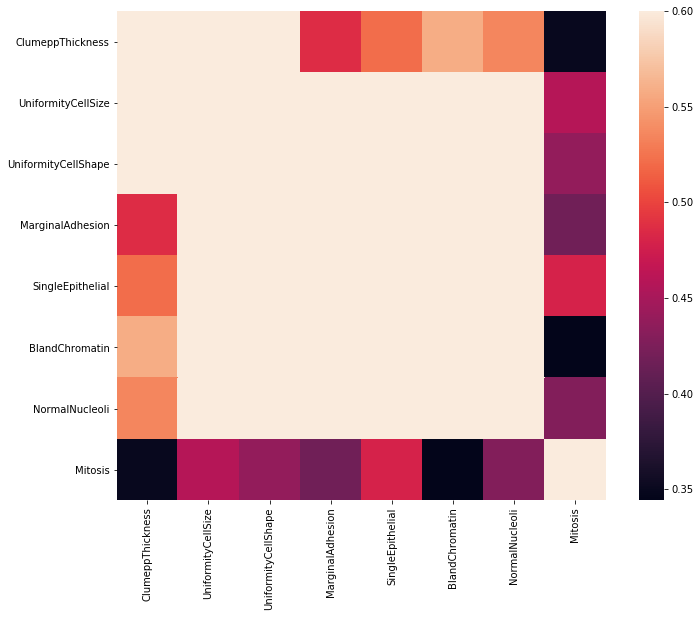

2019-06-07 00:26:37: In: run_correlation_matrix 


End 
2019-06-07 00:26:37: In: main We are running RandomForestClassifier 
2019-06-07 00:26:37: In: run_rf Begin run_rf part 1 
Training score = 1.0
Test score = 0.9714285714285714
2019-06-07 00:26:38: In: run_rf End run_rfr part 1 
2019-06-07 00:26:38: In: run_logistic_regression 


Begin 
2019-06-07 00:26:38: In: run_logistic_regression Running lr.fit for the training set 
2019-06-07 00:26:38: In: run_logistic_regression Running lr.fit for the training set 

R-squared simple model training set yields:
0.9697933227344993
here comes the test set
0.9714285714285714
2019-06-07 00:26:38: In: run_logistic_regression 


End 
2019-06-07 00:26:38: In: main End


 


In [306]:
main()